In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

In [19]:
import sys
print("python 버전: ", sys.version)

import pandas as pd
print("pandas 버전: ", pd.__version__)

import matplotlib
print("matplotlib 버전: ", matplotlib.__version__)

import numpy as np
print("NumPy 버전: ", np.__version__)

import scipy as sp
print("SciPy 버전: ", sp.__version__)

import IPython
print("IPython 버전: ", IPython.__version__)

import sklearn
print("scikit-learn 버전: ", sklearn.__version__)

python 버전:  3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
pandas 버전:  0.25.3
matplotlib 버전:  3.1.1
NumPy 버전:  1.16.4
SciPy 버전:  1.3.2
IPython 버전:  7.6.1
scikit-learn 버전:  0.22


In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [3]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

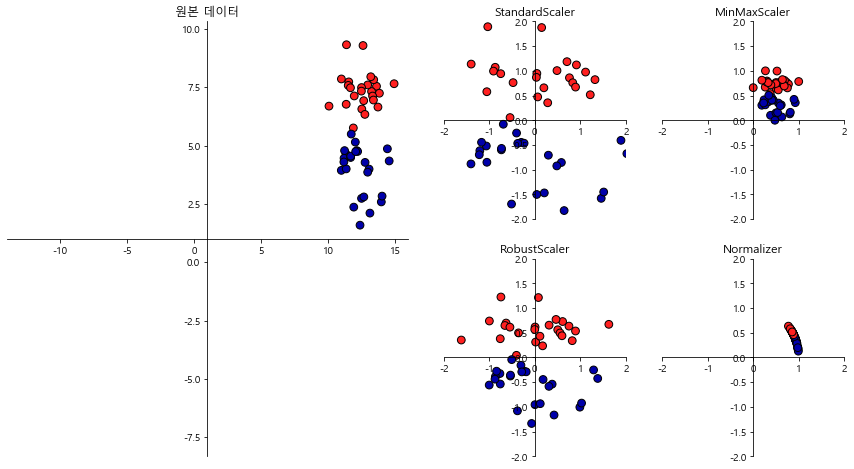

In [4]:
mglearn.plots.plot_scaling()

#### 여러가지 전처리 방법
#### 데이터 변환 적용하기

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

cancer_dataset = load_breast_cancer()
cancer_data = cancer_dataset.data
cancer_df = pd.DataFrame(data=cancer_data,
                        columns=cancer_dataset.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,...,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,...,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,...,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,...,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,...,0.40,0.16,0.24,0.08


In [6]:
print('feature들의 최소값')
print(cancer_df.min())
print('\nfeature들의 최대값')
print(cancer_df.max())


feature들의 최소값
mean radius                6.98e+00
mean texture               9.71e+00
mean perimeter             4.38e+01
mean area                  1.44e+02
mean smoothness            5.26e-02
mean compactness           1.94e-02
mean concavity             0.00e+00
mean concave points        0.00e+00
mean symmetry              1.06e-01
mean fractal dimension     5.00e-02
radius error               1.12e-01
texture error              3.60e-01
perimeter error            7.57e-01
area error                 6.80e+00
smoothness error           1.71e-03
compactness error          2.25e-03
concavity error            0.00e+00
concave points error       0.00e+00
symmetry error             7.88e-03
fractal dimension error    8.95e-04
worst radius               7.93e+00
worst texture              1.20e+01
worst perimeter            5.04e+01
worst area                 1.85e+02
worst smoothness           7.12e-02
worst compactness          2.73e-02
worst concavity            0.00e+00
worst concave 

In [7]:
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


# MinMaxScaler를 이용하여 전처리 후 속성값 확인하기

In [8]:
from sklearn.preprocessing import MinMaxScaler

#1.
scaler = MinMaxScaler()
# MinMaxSclaer의 fit 메서드는 훈련세트에 있는 특성마다 최대/최소값을 계산

#2.
scaler.fit(X_train)
# MinMaxScaler(copy=True, feature_range=(0,1))
# fit 메서드로 학습한 변환을 적용하려면 스케일 객체의 trnasform 메서드를 사용 데이터 변환

#3. train 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다.

print("변환된 후 크기:", X_train_scaled.shape)

print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))

print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# 데이터 변환 적용하기

In [9]:
# test 데이터 변환
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값: \n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최소값: \n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값: 
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최소값: 
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


# 유방암 데이터셋: 데이터 전처리를 하기전의 성능

In [10]:
from sklearn.svm import SVC

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)
svm=SVC(C=100)
svm.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.94


In [11]:
#0~1 사이로 스케일 조정
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# 조정된 데이터로  SVM 학습
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled, y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 훈련 세트 정확도 : 1.00
스케일 조정된 테스트 세트 정확도 : 0.97


In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()

# 훈련/ 테스트 세트로 나누기 

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)
svm=SVC(C=100)
svm.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

#0~1 사이로 스케일 조정
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# 조정된 데이터로  SVM 학습
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled, y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.94
스케일 조정된 훈련 세트 정확도 : 1.00
스케일 조정된 테스트 세트 정확도 : 0.97


# 2. Standard Scaling

# 데이터 전처리 성능 측정-StandardScaler 사용(유방암)

In [13]:
print('feature들의 평균 값')
print(cancer_df.mean())
print('\nfeature들의 분산 값')
print(cancer_df.var())

feature들의 평균 값
mean radius                1.41e+01
mean texture               1.93e+01
mean perimeter             9.20e+01
mean area                  6.55e+02
mean smoothness            9.64e-02
mean compactness           1.04e-01
mean concavity             8.88e-02
mean concave points        4.89e-02
mean symmetry              1.81e-01
mean fractal dimension     6.28e-02
radius error               4.05e-01
texture error              1.22e+00
perimeter error            2.87e+00
area error                 4.03e+01
smoothness error           7.04e-03
compactness error          2.55e-02
concavity error            3.19e-02
concave points error       1.18e-02
symmetry error             2.05e-02
fractal dimension error    3.79e-03
worst radius               1.63e+01
worst texture              2.57e+01
worst perimeter            1.07e+02
worst area                 8.81e+02
worst smoothness           1.32e-01
worst compactness          2.54e-01
worst concavity            2.72e-01
worst concave

# 데이터 전처리 성능 측정-StandardScaler 사용(유방암)

In [15]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled_standard = standard_scaler.transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled_standard, y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled_standard, y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled_standard, y_test)))

스케일 조정된 훈련 세트 정확도 : 1.00
스케일 조정된 테스트 세트 정확도 : 0.96


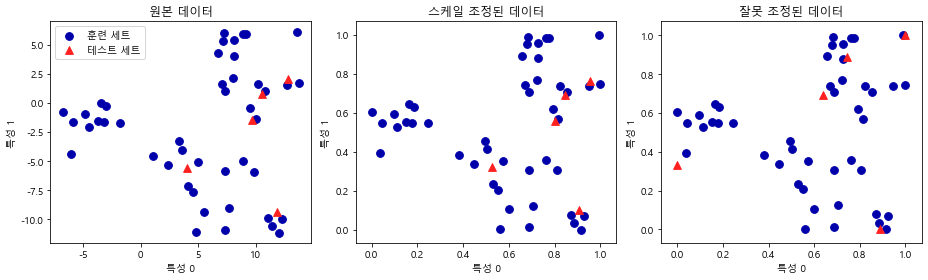

In [20]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

In [22]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.datasets import make_blobs

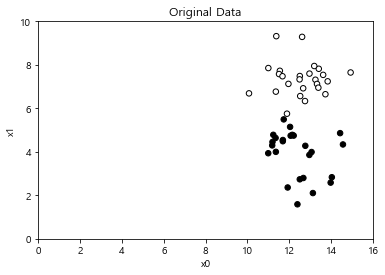

In [26]:
X,y = make_blobs(n_samples=50, 
                 centers=2,
                 random_state=4,
                 cluster_std=1)
X += 3

plt.scatter(X[:,0],
            X[:,1],
            c=y,
            s=30,
            edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


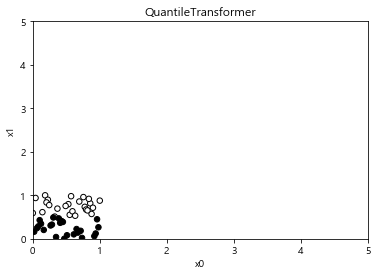

In [29]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],
            X_trans[:,1],
            c=y,
            s=30,
            edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

### 0과 1사이로 고르게 분포.(위 그래프)

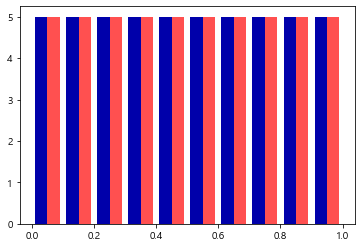

In [30]:
plt.hist(X_trans)
plt.show()

In [31]:
print(scaler.quantiles_.shape)

(50, 2)


In [32]:
x = np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:,0], [0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [33]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


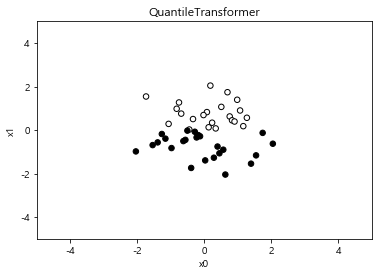

In [37]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],
           X_trans[:,1],
           c=y,
           s=30,
           edgecolors='black')

plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

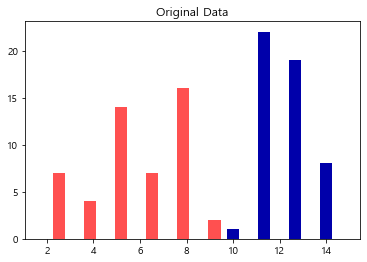

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


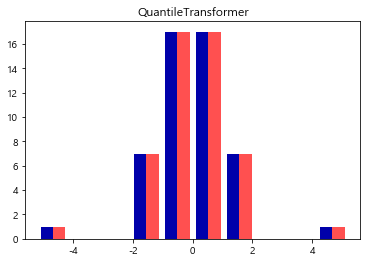

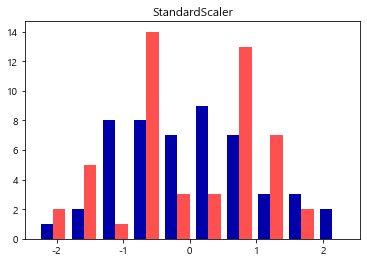

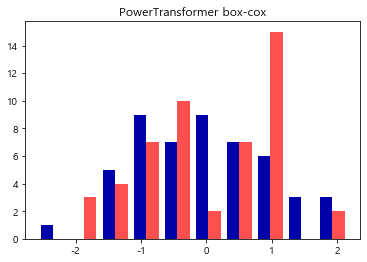

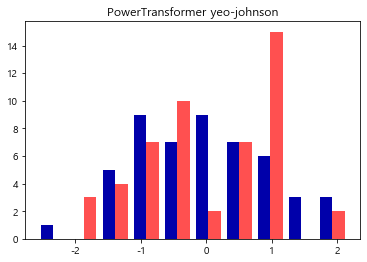

In [38]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title("StandardScaler")
plt.show()

X_trans = PowerTransformer(method = 'box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()